# Projet 3 : Préparez des données pour un organisme de santé publique

## Problématique
- L'agence Santé publique France souhaite améliorer sa base de données Open Food Facts et fait appel aux services de votre entreprise. Cette base de données open source est mise à la disposition de particuliers et d'organisations afin de leur permettre de connaître la qualité nutritionnelle de produits.
<br>
<br>
- Missions :
    - prise en main des données, les nettoyer et les explorer. 

## Importation des modules python

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from scipy.stats import chi2_contingency, f_oneway 

from wordcloud import WordCloud

# 1. Exploitation et nettoyage du jeu de données

- Importation du jeu de données Open Food Facts

In [2]:
# Import the dataset
open_food_facts = pd.read_csv("fr_openfoodfacts_org_products.csv",delimiter="\t",low_memory=False)
open_food_facts

code                                                url  \
0       0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1       0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2       0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3       0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4       0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
0           1474103893   2016-09-17T09:18:13Z   
1           1489069957   2017-03-09T14:32:37Z   
2           1489069957   2017-03-09T14:32:37Z   
3           1489055731   2017-03-09T10:35:31Z   
4           1489055653   2017-03-09T10:34:13Z   
...                ...                    ...   
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ... ph_100g  \
0                                   NaN      1kg  ...     NaN   
1                                   NaN      NaN  ...     NaN   
2                                   NaN      NaN  ...     NaN   
3                                   NaN      NaN  ...     NaN   
4                                   NaN      NaN  ...     NaN   
...                                 ...      ...  ...     ...   
320767                              NaN        1  ...     NaN   
320768                              NaN      NaN  ...     NaN   
320769  Leba pickle flavor potato chips     50 g  ...     NaN   
320770                              NaN      67g  ...     NaN   
320771                              NaN      NaN  ...     NaN   

       fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g  \
0                              NaN                              N

In [3]:
# All the informations of the data
open_food_facts.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

- Taux de remplissage des features :

In [4]:
# Rate of NA values for all features
(open_food_facts.isnull().mean(axis=0)*100).sample(60).reset_index().rename(columns={"index": "colonnes", 0: "NA_rate"})

colonnes     NA_rate
0                                 sucrose_100g   99.977554
1                              chlorophyl_100g  100.000000
2                      nutrition-score-fr_100g   31.038245
3                                         code    0.007170
4                                    emb_codes   90.863916
5                                proteins_100g   18.969860
6                          serum-proteins_100g   99.995012
7                                  labels_tags   85.458831
8                                    countries    0.087289
9                           nutrition_grade_uk  100.000000
10                             vitamin-pp_100g   96.343509
11                                     creator    0.000623
12                                polyols_100g   99.870936
13                               chromium_100g   99.993765
14                             last_modified_t    0.000000
15                                     ph_100g   99.984724
16                                taurine_100g   99.990959
17                            vitamin-b12_100g   98.347736
18                               fructose_100g   99.988154
19                              trans-fat_100g   55.327148
20                             phosphorus_100g   98.177833
21                   alpha-linolenic-acid_100g   99.942015
22                               no_nutriments  100.000000
23                                   additives   22.404387
24                                      labels   85.485329
25                                maltose_100g   99.998753
26                              countries_tags    0.087289
27                              vitamin-a_100g   57.117828
28                               selenium_100g   99.635878
29                                 silica_100g   99.988154
30                            omega-6-fat_100g   99.941391
31                                 traces_tags   92.415485
32                                countries_fr    0.087289
33                              magnesium_100g   98.050640
34                 ingredients_from_palm_oil_n   22.393787
35                                   states_fr    0.014340
36                  eicosapentaenoic-acid_100g   99.988154
37                           caproic-acid_100g  100.000000
38                             image_small_url   76.358286
39                          melissic-acid_100g  100.000000
40                                calcium_100g   56.027958
41                            bicarbonate_100g   99.974748
42                            ingredients_text   22.386617
43                               caffeine_100g   99.975684
44                          nutrition_grade_fr   31.038245
45                           behenic-acid_100g   99.992830
46                   ingredients_from_palm_oil  100.000000
47                                 copper_100g   99.343459
48                            capric-acid_100g   99.999377
49                          nervonic-acid_100g  100.000000
50                              mead-acid_100g  100.000000
51                               pnns_groups_1   71.471014
52                                   created_t    0.000935
53                               pnns_groups_2   70.542628
54                             vitamin-b1_100g   96.522764
55  ingredients_that_may_be_from_palm_oil_tags   96.353796
56                              emb_codes_tags   90.864851
57                                   zinc_100g   98.775142
58                              potassium_100g   92.284863
59                          palmitic-acid_100g   99.999688

<Axes: title={'center': 'Distribution du taux de valeurs manquantes des variables'}>

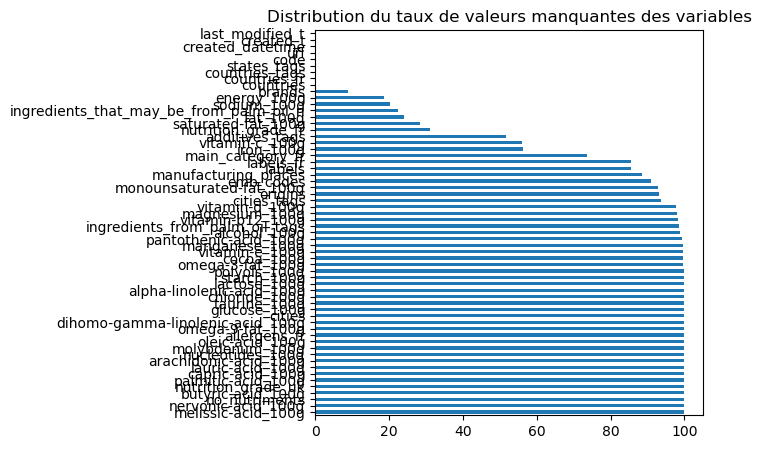

In [5]:
# Plotting of the rate of na values for all features 
plt.figure(figsize=(5,5))
(open_food_facts.isnull().mean(axis=0)*100).sample(60).sort_values(ascending=False).plot(kind='barh', title="Distribution du taux de valeurs manquantes des variables")

- La plupart des variables sont remplies de valeurs nulles/manquantes à hauteur de 75% ou plus. Nous enlevons ci-dessous les variables qui ne sont pas réellement remplies au moins à 25%.
<br>
- Nous enlevons également les colonnes vides(s'il en existe) et les produits dupliqués en s'appuyant sur le code barre de chaque produit.
- Nous remplaçons enfin les tirets sur les noms de certaines variables nutritionnelles par des tirets du bas.

In [6]:
# Drop empty columns
open_food_facts = open_food_facts.dropna(axis="columns", how="all")

# Change "-" to "_" in column names
new_cols = [column.replace("-","_") for column in open_food_facts.columns]
open_food_facts = open_food_facts.rename(columns=dict(zip(open_food_facts.columns,new_cols)))

# Drop duplicated products with respect to the barcode code
open_food_facts.drop_duplicates(subset ="code", keep = 'last', inplace=True)

# Drop columns where 75+% of values are nan
na_percent = open_food_facts.isnull().mean(axis=0)*100    # percentage of na values per column

na_percent_columns = na_percent.reset_index().rename(columns={"index":"columns", 0:"nan"})
list_columns = na_percent_columns.loc[~(na_percent_columns.nan>75)]["columns"].tolist()

# The cleaned dataset we keep
open_food_facts_ = open_food_facts.loc[:,list_columns]

open_food_facts_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320750 entries, 0 to 320771
Data columns (total 50 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320748 non-null  object 
 3   created_t                                320750 non-null  object 
 4   created_datetime                         320748 non-null  object 
 5   last_modified_t                          320750 non-null  object 
 6   last_modified_datetime                   320750 non-null  object 
 7   product_name                             302988 non-null  object 
 8   quantity                                 104801 non-null  object 
 9   brands                                   292360 non-null  object 
 10  brands_tags                     

- Il nous reste enfin 50 variables parmi lesquelles nous allons choisir celles utiles pour explorer des données nutritionnelles.

# 2. Sélection des variables et traitement des outliers(valeurs aberrantes)

## Sélection des variables

Voici ci-dessous les caractéristiques importantes notées pour une alimentation saine :

- Les caractéristiques nutritionnelles de bases d'une alimentation santé : 
    - macronutriments : protéines, glucides et lipides apportent l'énergie nécessaire chaque jour.
    - micronutriments : vitamines et minéraux n'apportent aucune calorie mais sont indispensables aux multiples réactions enzymatiques, métaboliques et chimiques de l’organisme.
<br>
- Les détails sur chaque produit/aliment :
    - product_name: Nom du produit 
    - brands: Marque du produit 
    - pnns_groups_1 & pnns_groups_2 : groupes et sous-groupes d'aliments définis par l'Afssa (Agence Française de sécurité     sanitaire des aliments) en 2001 et mis à jours par l'Anses en 2016.
    - La grade et le score de nutrition :
        - **Selon Santé Publique France**, la grade de nutrition est attribuée sur la base d'un score(le score de nutrition) prenant en compte pour 100 gramme ou 100 mL de produit, la teneur :
            - en nutriments et aliments à favoriser (fibres, protéines, fruits, légumes, légumineuses, fruits à coques, huile de colza, de noix et d’olive),
            - et en nutriments à limiter (énergie, acides gras saturés, sucres, sel).
<br>           
            Après calcul, le score obtenu par un produit permet de lui attribuer une lettre(allant de A à E) et une couleur.    

In [7]:
# Get selected features in a list
selected_columns = ["product_name","brands","pnns_groups_1","pnns_groups_2","countries","countries_fr","nutrition_grade_fr",
                    "nutrition_score_fr_100g","energy_100g","fat_100g","carbohydrates_100g","sugars_100g","fiber_100g",
                    "proteins_100g","salt_100g","sodium_100g"]

# Keeping only selected features 
open_food_facts_ = open_food_facts_.loc[:,selected_columns]

# Drop products where we don't have the name, the brand, the group of aliment and the nutrition grade.
open_food_facts_ = open_food_facts_.dropna(subset=["product_name","brands","pnns_groups_1","pnns_groups_2","nutrition_grade_fr"])
open_food_facts_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60658 entries, 106 to 320763
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             60658 non-null  object 
 1   brands                   60658 non-null  object 
 2   pnns_groups_1            60658 non-null  object 
 3   pnns_groups_2            60658 non-null  object 
 4   countries                60605 non-null  object 
 5   countries_fr             60605 non-null  object 
 6   nutrition_grade_fr       60658 non-null  object 
 7   nutrition_score_fr_100g  60658 non-null  float64
 8   energy_100g              60477 non-null  float64
 9   fat_100g                 57170 non-null  float64
 10  carbohydrates_100g       57112 non-null  float64
 11  sugars_100g              60477 non-null  float64
 12  fiber_100g               39088 non-null  float64
 13  proteins_100g            60477 non-null  float64
 14  salt_100g          

- Les variables nutritionnelles ne sont pas toutes remplies à 100% sur tous les produits. Nous allons effectuer une imputation par la méthode des plus proches voisins pour combler les quelques valeurs manquantes.

## Imputation des valeurs manquantes par la méthode des K-nn

Nous allons utiliser la classe KNNImputer de la librairie Scikit-learn pour appliquer cette méthode d'imputation. 
<br>
Documentation : 
- La classe KNNImputer fournit une imputation pour combler les valeurs manquantes à l'aide de l'approche k-Nearest Neighbours. Par défaut, une métrique de distance euclidienne prenant en charge les valeurs manquantes, "nan_euclidean_distances", est utilisée pour rechercher les voisins les plus proches. Chaque valeur manquante d'une variable est imputée à l'aide des valeurs des "n_neighbors" voisins les plus proches qui ont une valeur non manquante pour la variable. Les caractéristiques des voisins sont moyennées uniformément ou pondérées en fonction de la distance par rapport à chaque voisin.

In [8]:
# The features to be traited 
knn_cols = ["energy_100g","fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
                "salt_100g","sodium_100g"]
# Imputer class
imputer = KNNImputer(missing_values=np.nan, weights="distance")

# K-nn fit on all data
open_food_facts_knn = imputer.fit_transform(open_food_facts_.loc[:,knn_cols])

In [9]:
# Array to pandas df
open_food_facts_knn_df = pd.DataFrame(open_food_facts_knn, columns=knn_cols)
# We get the dataset with imputations
for knn_col in knn_cols:
    open_food_facts_[knn_col] = open_food_facts_knn_df[knn_col].values

In [10]:
open_food_facts_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60658 entries, 106 to 320763
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             60658 non-null  object 
 1   brands                   60658 non-null  object 
 2   pnns_groups_1            60658 non-null  object 
 3   pnns_groups_2            60658 non-null  object 
 4   countries                60605 non-null  object 
 5   countries_fr             60605 non-null  object 
 6   nutrition_grade_fr       60658 non-null  object 
 7   nutrition_score_fr_100g  60658 non-null  float64
 8   energy_100g              60658 non-null  float64
 9   fat_100g                 60658 non-null  float64
 10  carbohydrates_100g       60658 non-null  float64
 11  sugars_100g              60658 non-null  float64
 12  fiber_100g               60658 non-null  float64
 13  proteins_100g            60658 non-null  float64
 14  salt_100g          

## Traitement des outliers(valeurs aberrantes)

Les scores de nutrition sont réparties selon la grade de nutrition d'après le site de **Nestle**. Ainsi, nous avons normalement :
- grade a : le nutri_score est compris entre -15 et -1
- grade b : le nutri_score est compris entre 0 et 2
- grade c : le nutri_score est compris entre 3 et 10
- grade d : le nutri_score est compris entre 11 et 18
- grade e : le nutri_score est compris entre 19 et 40

Nous allons donc enlever les valeurs atypiques qui ne respecteraient pas ces normes.

In [11]:
# Removing products which classes are not the actual ones.
open_food_facts_ = open_food_facts_.loc[((open_food_facts_.nutrition_grade_fr=="a")&(open_food_facts_.nutrition_score_fr_100g<=-1))
   | ((open_food_facts_.nutrition_grade_fr=="b")&((open_food_facts_.nutrition_score_fr_100g>=0)&(open_food_facts_.nutrition_score_fr_100g<=2)))
   | ((open_food_facts_.nutrition_grade_fr=="c")&((open_food_facts_.nutrition_score_fr_100g>=3)&(open_food_facts_.nutrition_score_fr_100g<=10)))
   | ((open_food_facts_.nutrition_grade_fr=="d")&((open_food_facts_.nutrition_score_fr_100g>=11)&(open_food_facts_.nutrition_score_fr_100g<=18)))
   | ((open_food_facts_.nutrition_grade_fr=="e")&((open_food_facts_.nutrition_score_fr_100g>=19)&(open_food_facts_.nutrition_score_fr_100g<=40)))] 

print(f"Nous avons supprimé les valeurs atypiques dans la variable de score de nutrition.\nLe dataset compte désormais {open_food_facts_.shape[0]} produits.")

Nous avons supprimé les valeurs atypiques dans la variable de score de nutrition.
Le dataset compte désormais 57480 produits.


- Nous enlevons également les valeurs nutritionnelles qui dépassent le seuil de l'écart interquartile(IQR)

In [12]:
num_columns = open_food_facts_.select_dtypes(include = ['float64']).columns
for column in num_columns:
    # Limit value with interquartile intervalle
    born_sup = open_food_facts_.loc[:,column].quantile(0.75) + 1.5*(open_food_facts_.loc[:,column].quantile(0.75)-open_food_facts_.loc[:,column].quantile(0.25))
    
    # Dealing with energy_100 outliers
    open_food_facts_ = open_food_facts_.loc[~(open_food_facts_.loc[:,column]>born_sup)]

In [13]:
# Mask of products where fields that end with 100g have value greater than 100((exept energy_100g)).
fields_upper_than_100g = open_food_facts_.loc[(open_food_facts_.fat_100g>100)
                              | (open_food_facts_.carbohydrates_100g> 100)
                              | (open_food_facts_.sugars_100g>100)
                              | (open_food_facts_.fiber_100g>100)
                              | (open_food_facts_.proteins_100g>100)
                              | (open_food_facts_.salt_100g>100)
                              | (open_food_facts_.sodium_100g>100)] 

# Drop lines where nutrition features are greater than 100g(exept energy_100g)
open_food_facts_.drop(axis=0, index=fields_upper_than_100g.index, inplace=True)
print(f"Nous avons supprimé les valeurs dépassant 100g(aberrantes) dans les variables nutritionnelles concernées.\nLe dataset compte désormais {open_food_facts_.shape[0]} lignes.")

Nous avons supprimé les valeurs dépassant 100g(aberrantes) dans les variables nutritionnelles concernées.
Le dataset compte désormais 43159 lignes.


In [14]:
open_food_facts_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43159 entries, 174 to 320751
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             43159 non-null  object 
 1   brands                   43159 non-null  object 
 2   pnns_groups_1            43159 non-null  object 
 3   pnns_groups_2            43159 non-null  object 
 4   countries                43125 non-null  object 
 5   countries_fr             43125 non-null  object 
 6   nutrition_grade_fr       43159 non-null  object 
 7   nutrition_score_fr_100g  43159 non-null  float64
 8   energy_100g              43159 non-null  float64
 9   fat_100g                 43159 non-null  float64
 10  carbohydrates_100g       43159 non-null  float64
 11  sugars_100g              43159 non-null  float64
 12  fiber_100g               43159 non-null  float64
 13  proteins_100g            43159 non-null  float64
 14  salt_100g          

# 3. Analyse descriptive

## 3.1 Analyse univariée

### Analyse univariée des variables numériques

In [18]:
# A function to visualize the distribution of numerical features
def univariate_analysis(data):
    
    num_columns = data.select_dtypes(include = ['float64']).columns
    for column in num_columns:
        print(f"Description et analyse univariée de la variable {column} :\nmean : {round(data[column].mean(),3)}\nstd : {round(data[column].std(),3)}\nmedian : {round(data[column].quantile(0.5),3)}\nquartile q1: {round(data[column].quantile(0.25),3)}\nquartile q3 : {round(data[column].quantile(0.75),3)}\nmin : {round(data[column].min(),3)}\nmax : {round(data[column].max(),3)}")
        
        # Boxplot
        plt.figure(figsize=(5,5))
        sns.boxplot(x=column, data = data)
        plt.title(f'Boite à moustache de la variable de nutrition {column}')
        plt.show()    
        
        # Distribution
        plt.figure(figsize=(5,5))
        sns.displot(data[column], kde = True)
        plt.title(f'Distribution de la variable {column}')
        plt.show()
        print("\n")

Description et analyse univariée de la variable nutrition_score_fr_100g :
mean : 6.567
std : 8.749
median : 4.0
quartile q1: 0.0
quartile q3 : 13.0
min : -14.0
max : 35.0


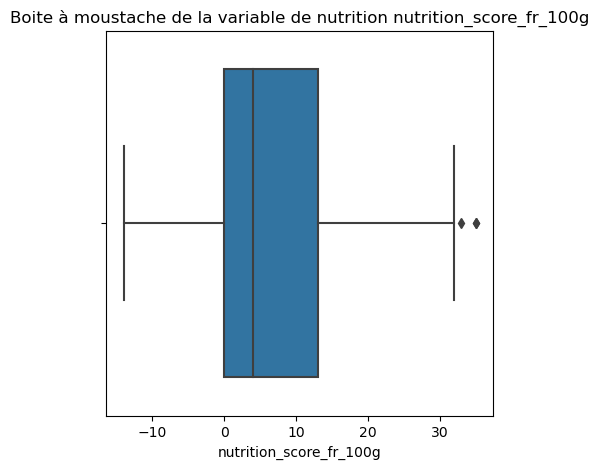

<Figure size 500x500 with 0 Axes>

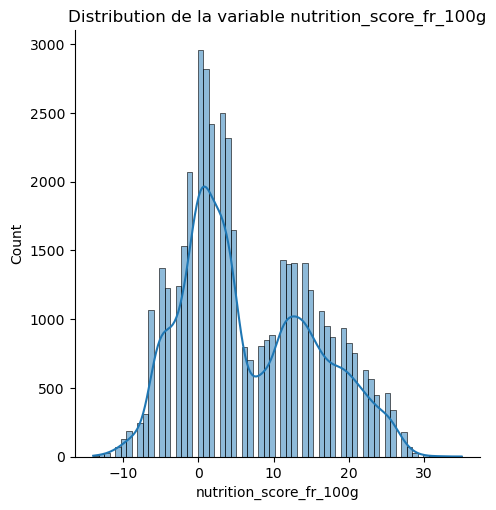



Description et analyse univariée de la variable energy_100g :
mean : 972.313
std : 678.739
median : 833.0
quartile q1: 378.0
quartile q3 : 1519.0
min : 0.0
max : 3404.0


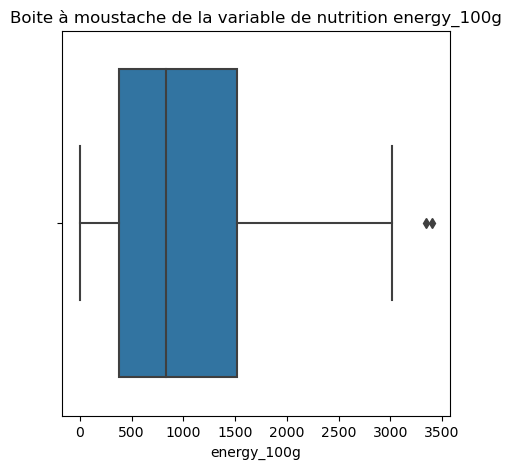

<Figure size 500x500 with 0 Axes>

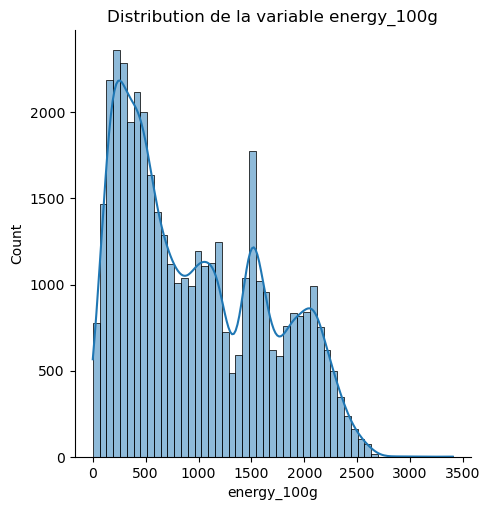



Description et analyse univariée de la variable fat_100g :
mean : 10.706
std : 11.387
median : 6.1
quartile q1: 1.5
quartile q3 : 18.0
min : 0.0
max : 52.4


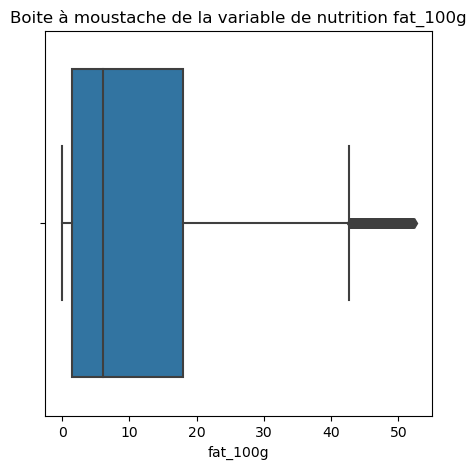

<Figure size 500x500 with 0 Axes>

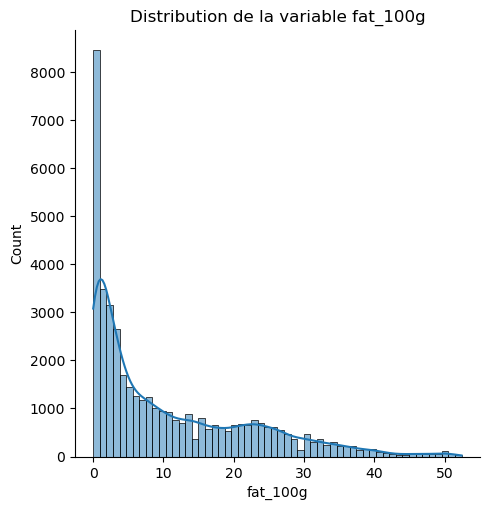



Description et analyse univariée de la variable carbohydrates_100g :
mean : 26.462
std : 25.57
median : 15.0
quartile q1: 4.8
quartile q3 : 49.7
min : 0.0
max : 100.0


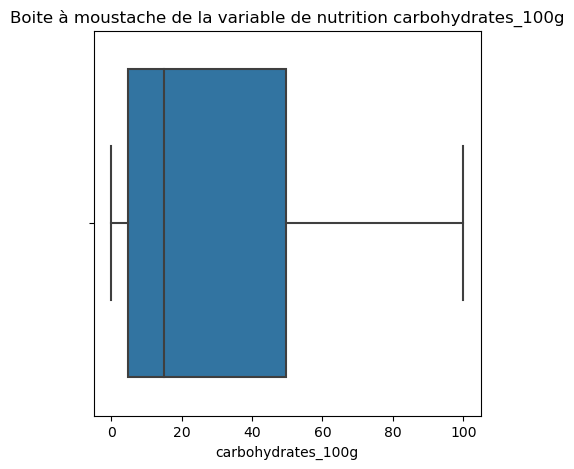

<Figure size 500x500 with 0 Axes>

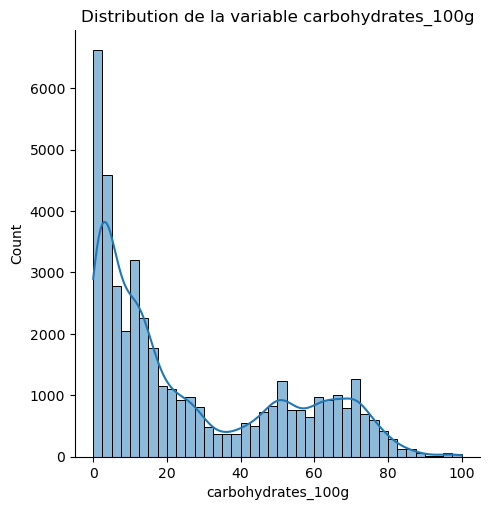



Description et analyse univariée de la variable sugars_100g :
mean : 9.53
std : 12.194
median : 3.6
quartile q1: 1.1
quartile q3 : 13.1
min : -0.1
max : 48.33


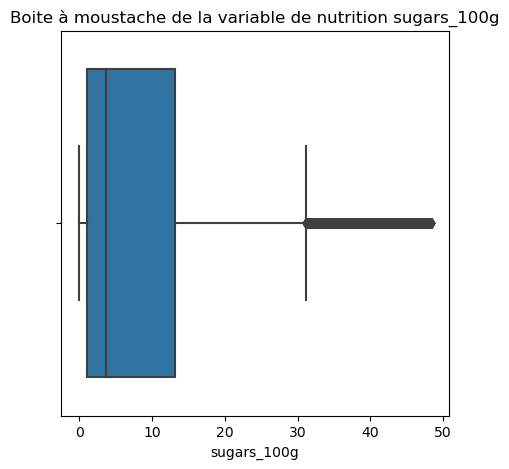

<Figure size 500x500 with 0 Axes>

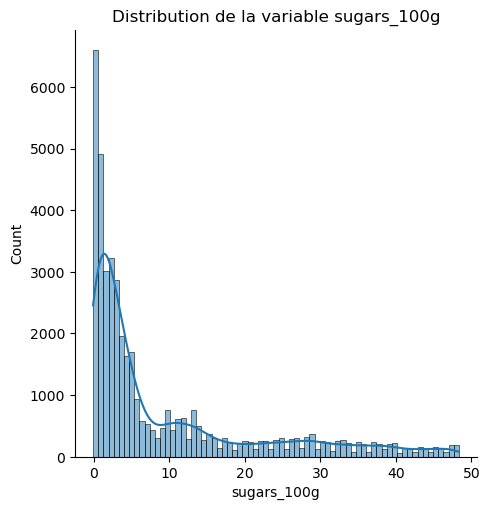



Description et analyse univariée de la variable fiber_100g :
mean : 1.91
std : 1.73
median : 1.52
quartile q1: 0.5
quartile q3 : 2.912
min : 0.0
max : 7.336


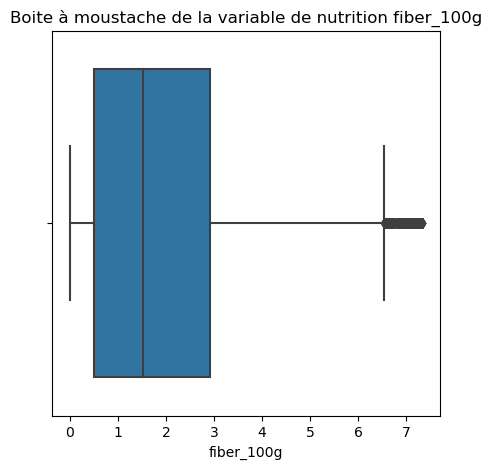

<Figure size 500x500 with 0 Axes>

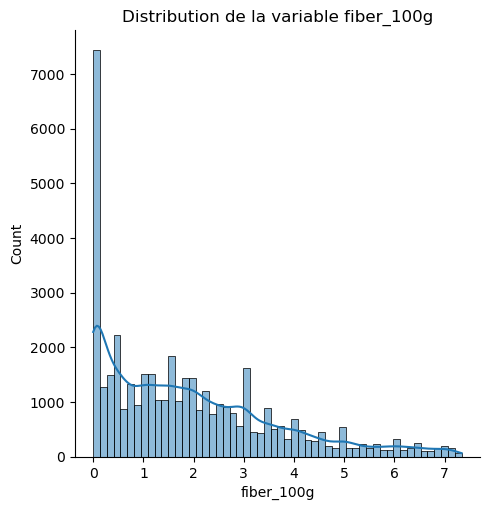



Description et analyse univariée de la variable proteins_100g :
mean : 6.959
std : 5.609
median : 6.0
quartile q1: 2.7
quartile q3 : 9.8
min : 0.0
max : 23.21


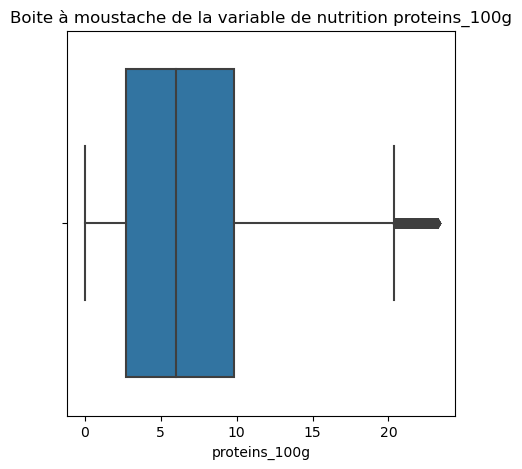

<Figure size 500x500 with 0 Axes>

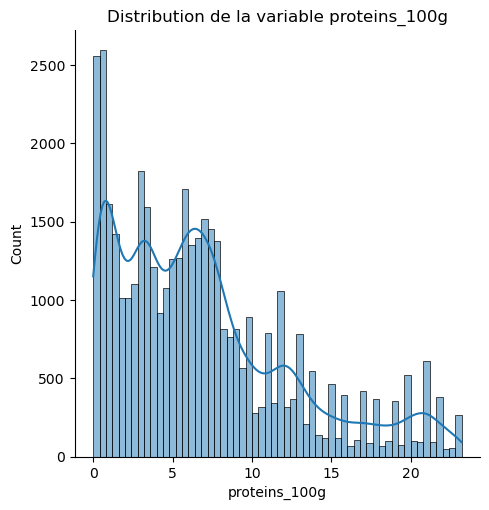



Description et analyse univariée de la variable salt_100g :
mean : 0.749
std : 0.682
median : 0.65
quartile q1: 0.11
quartile q3 : 1.2
min : 0.0
max : 2.83


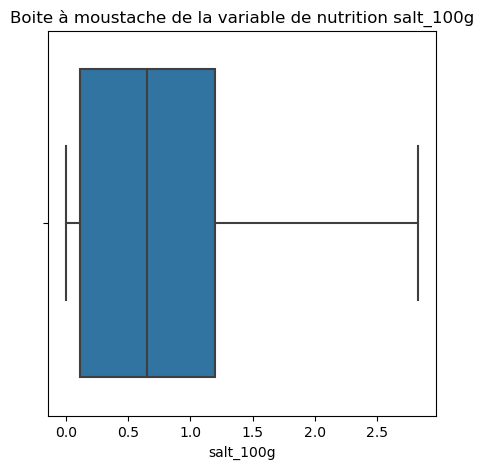

<Figure size 500x500 with 0 Axes>

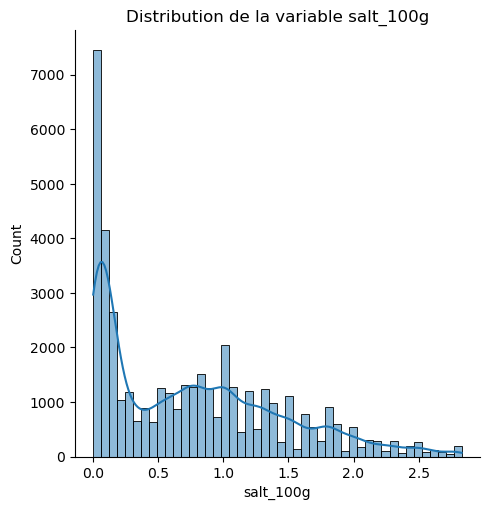



Description et analyse univariée de la variable sodium_100g :
mean : 0.295
std : 0.268
median : 0.256
quartile q1: 0.043
quartile q3 : 0.472
min : 0.0
max : 1.114


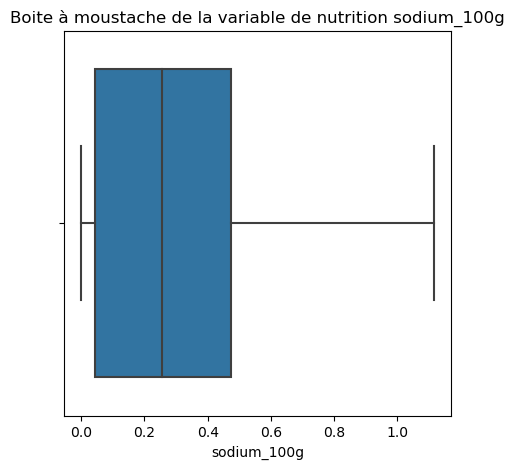

<Figure size 500x500 with 0 Axes>

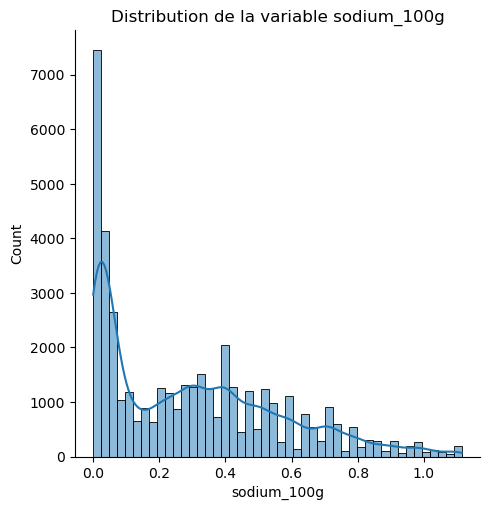

In [19]:
# Univariate analysis for numerical features
univariate_analysis(open_food_facts_)

Interprétation des résultats :

Les distributions des variables nutritionnelles ci-dessous ont des allures similaires:
- fat_100g
- carbohydrates_100g (à l’exception de la partie entre 40 et 80g)
- sugars_100g
- fiber_100g
- proteins_100g
- salt_100g
- sodium_100g

La variable nutrition_score_fr_100g est une variable quantitative discrète qui prend des valeurs entières comprises entre -15 et 35.

### Analyse univariée des variables catégorielles

In [20]:
# All the aliment groups
open_food_facts_.pnns_groups_1.value_counts().sort_index(ascending=True)

Beverages                  2094
Cereals and potatoes       5328
Composite foods            5433
Fat and sauces             1804
Fish Meat Eggs             3807
Fruits and vegetables      2975
Milk and dairy products    5911
Salty snacks               1679
Sugary snacks              5395
cereals-and-potatoes         10
fruits-and-vegetables       654
sugary-snacks               383
unknown                    7686
Name: pnns_groups_1, dtype: int64

In [21]:
# All the aliment sub-groups
open_food_facts_.pnns_groups_2.value_counts().sort_index(ascending=True)

Appetizers                          1529
Artificially sweetened beverages     109
Biscuits and cakes                  3544
Bread                               1213
Breakfast cereals                    760
Cereals                             2891
Cheese                              2041
Chocolate products                   771
Dairy desserts                       686
Dressings and sauces                1707
Dried fruits                          95
Eggs                                 148
Fats                                  97
Fish and seafood                    1232
Fruit juices                         988
Fruit nectars                         16
Fruits                              1016
Ice cream                            598
Legumes                              388
Meat                                 806
Milk and yogurt                     2586
Non-sugared beverages                787
Nuts                                 146
One-dish meals                      4372
Pizza pies and q

Il y a des groupes et/ou sous-groupes d'aliments qui se dupliquent en deux classes à cause des erreurs de saisie ou de la cassse des mots.
<br>
<br>
Nous les corrigeons ci-dessous afin de ne garder que de vrais groupes d'aliments.

In [22]:
# Updating pnns_groups_1 & pnns_groups_2 columns by replacing 

open_food_facts_["pnns_groups_1"] = open_food_facts_["pnns_groups_1"].str.capitalize().str.replace("-", " ")

open_food_facts_["pnns_groups_2"] = open_food_facts_["pnns_groups_2"].str.capitalize().str.replace("-",
                                                                                   " ").replace("cereals",
                                                                                        "Cereals").replace("fruits",
                                                                                         "Fruits").replace("legumes",
                                                                                         "Legumes").replace("vegetables",
                                                                                         "Vegetables").replace("nuts",
                                                                                         "Nuts")

In [23]:
# Now we get these labels for pnns_groups_1
open_food_facts_["pnns_groups_1"].value_counts().sort_index(ascending=True)

Beverages                  2094
Cereals and potatoes       5338
Composite foods            5433
Fat and sauces             1804
Fish meat eggs             3807
Fruits and vegetables      3629
Milk and dairy products    5911
Salty snacks               1679
Sugary snacks              5778
Unknown                    7686
Name: pnns_groups_1, dtype: int64

In [24]:
# And we get these labels for pnns_groups_2
open_food_facts_["pnns_groups_2"].value_counts().sort_values(ascending=True)

Salty and fatty products               4
Fruit nectars                         16
Potatoes                              76
Dried fruits                          95
Fats                                  97
Artificially sweetened beverages     109
Nuts                                 146
Eggs                                 148
Sweetened beverages                  194
Pastries                             383
Legumes                              388
Soups                                416
Pizza pies and quiche                442
Ice cream                            598
Sandwich                             619
Dairy desserts                       686
Breakfast cereals                    760
Chocolate products                   771
Non sugared beverages                787
Meat                                 806
Fruit juices                         988
Fruits                              1054
Sweets                              1080
Bread                               1213
Fish and seafood

In [26]:
# A function to visualize the classes/labels for categorical features
def univariate_analysis_categories(data):
    
    cat_columns = ["pnns_groups_1", "pnns_groups_2","nutrition_grade_fr"]
    for column in cat_columns:
        print(f"Description et analyse univariée de la colonne {column} :")
        
        # Histplot
        plt.figure(figsize=(5,5))
        sns.histplot(data=data.sort_values(column, ascending=True), x=column)
        plt.title(column)
        if column!="nutrition_grade_fr":
            plt.xticks(rotation = 90)
        plt.show()
        
        # Pie plot for the proportion of each label
        if column!="pnns_groups_2":
            fig, ax = plt.subplots(figsize=(5, 5))
            plt.pie(data.groupby(by=column)["product_name"].nunique().sort_values(ascending=False), 
                    labels=data.groupby(by=column)["product_name"].nunique().sort_values(ascending=False).index, 
                    autopct='%1.f%%')
            plt.title(f"Proportion de chaque classe de la variable {column}")
            plt.show()
        
        # A worcloud for aliment group labels to better see the most represented ones:
        if column=="pnns_groups_2":
            text_to_cloud = data[column].value_counts().to_dict()
            
            # The wordcloud object
            wordcloud = WordCloud(background_color="white", contour_width=3, width=1000,height=500,
            contour_color='steelblue')
            # Words
            pnns_groups_cloud = wordcloud.generate_from_frequencies(text_to_cloud)
            # Imshow
            plt.imshow(pnns_groups_cloud, interpolation="bilinear")
            plt.axis("off")
            plt.title("Nuage de mots des sous-groupes d'aliments les plus représentés")
            plt.xticks(rotation = 90)                    
            plt.show()
            print("-"*100)

Description et analyse univariée de la colonne pnns_groups_1 :


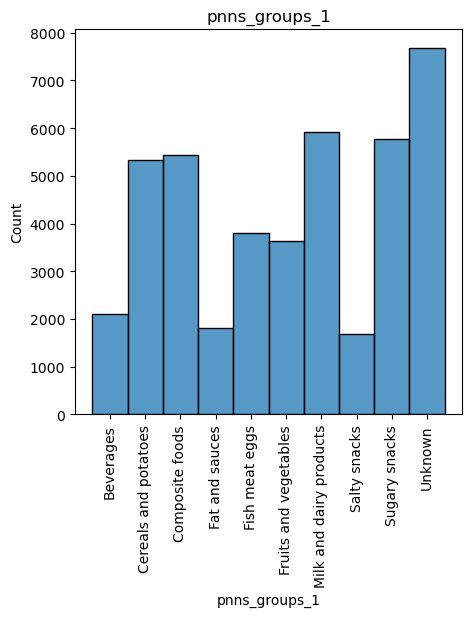

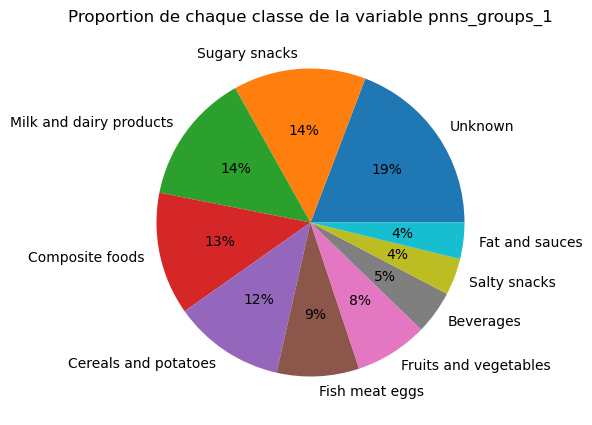

Description et analyse univariée de la colonne pnns_groups_2 :


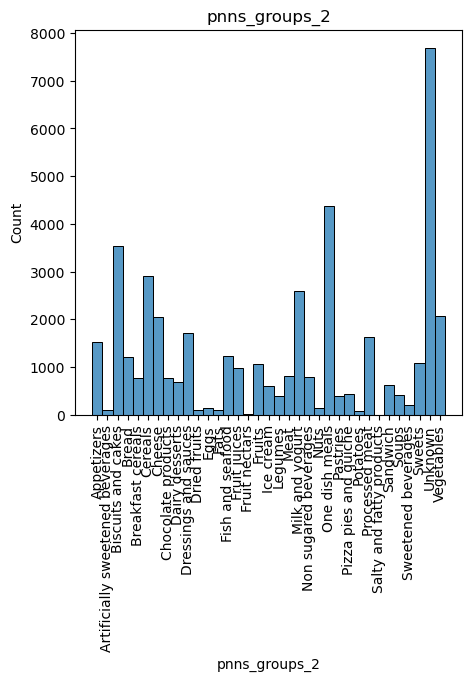

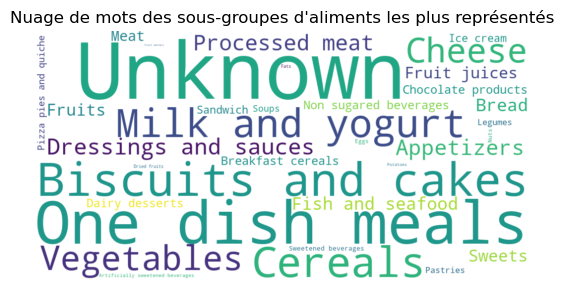

----------------------------------------------------------------------------------------------------
Description et analyse univariée de la colonne nutrition_grade_fr :


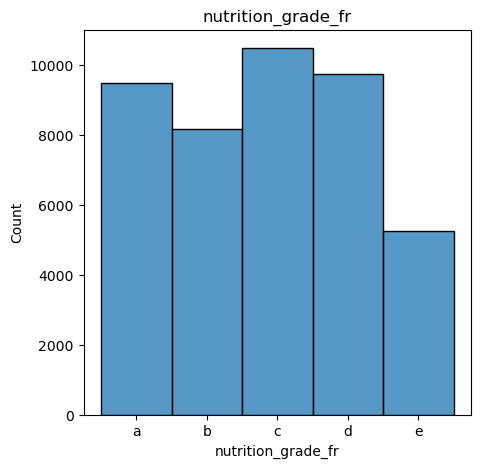

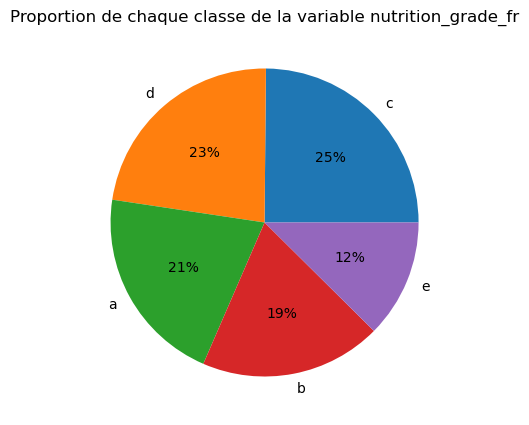

In [27]:
# Univariate analysis for categorical data
univariate_analysis_categories(open_food_facts_)

Interprétation :
- Les distributions des groupes et sous-groupes d'aliments ne sont pas équilibrées.
<br>
- La distribution de la variable de grade de nutrition est un peu plus équilibrée. On remarque néanmoins que la grade(classe) "c" est plus représentée que le reste.

## 3.2 Analyse bivariée 

### Matrice de corrélation des variables nutritionnelles

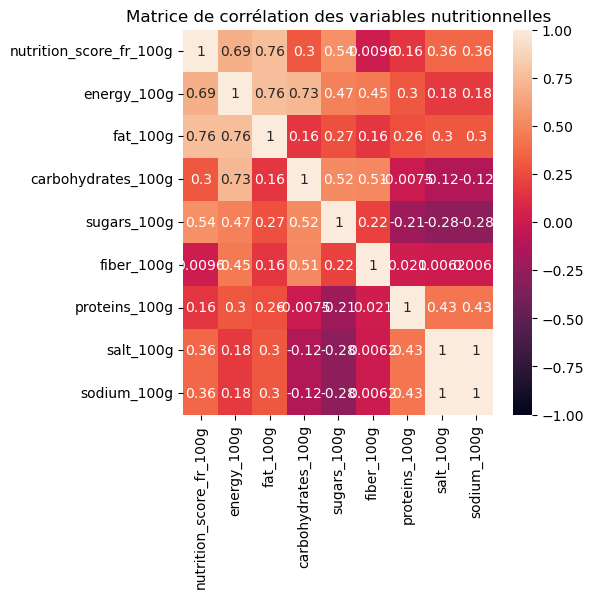

In [28]:
# Correlation matrix
correlation_table = open_food_facts_.loc[:,open_food_facts_.select_dtypes(include = ['float64']).columns].corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_table, vmin=-1, vmax=1,annot=True,)
plt.title('Matrice de corrélation des variables nutritionnelles')
plt.show()

#### Interprétation de la matrice de corrélation :
<br>
<br>
Il y a une forte corrélation entre nutrition_score_fr_100g avec :

- energy_100g
<br>
- fat_100g
<br>
- sugars_100g

Il y a également une forte corrélation entre energy_100g avec :

- nutrition_score_fr_100g
<br>
- fat_100g
<br>
- carbohydrates_100g

Les variables sodium_100g et salt_100g sont très fortement corrélées. 
- Ceci pourrait s'expliquer par le fait que le sodium soit un composant du sel. 1g de sel contient en effet 400 mg de sodium.
- Dans la suite, on ne garde que la variable salt_100g.

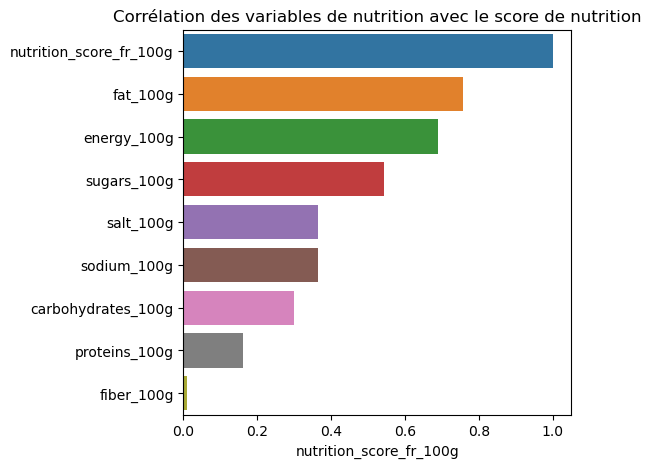

In [29]:
# Correlation with the nutrition_score_fr_100g target
plt.figure(figsize=(5,5))
sns.barplot(x=correlation_table.sort_values('nutrition_score_fr_100g',ascending=False).nutrition_score_fr_100g, y=correlation_table.sort_values('nutrition_score_fr_100g',ascending=False).index)
plt.title('Corrélation des variables de nutrition avec le score de nutrition')
plt.show()

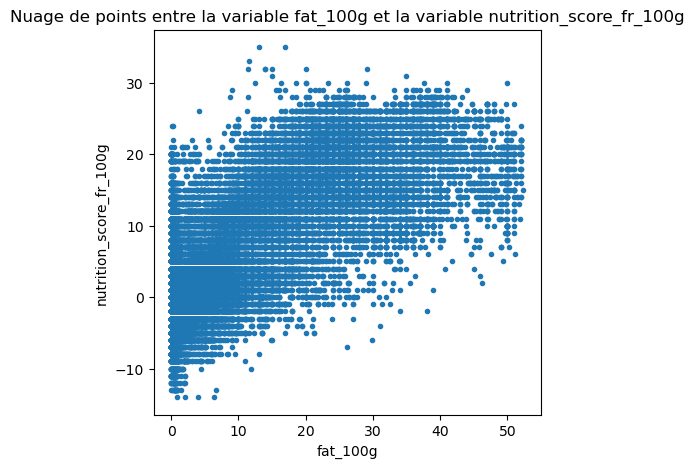

In [30]:
# One exemple of the correlation observed (with fat_100g feature)
plt.figure(figsize=(5,5))
plt.plot(open_food_facts_.fat_100g,open_food_facts_.nutrition_score_fr_100g, linestyle='', marker='.')
plt.xlabel("fat_100g")
plt.ylabel("nutrition_score_fr_100g")
plt.title("Nuage de points entre la variable fat_100g et la variable nutrition_score_fr_100g")
plt.show()

Remarque :
<br>
La relation linéaire observée entre fat_100g et nutrition_score_fr_100g avec la matrice de corrélation se précise avec le nuage de point.

<Figure size 500x500 with 0 Axes>

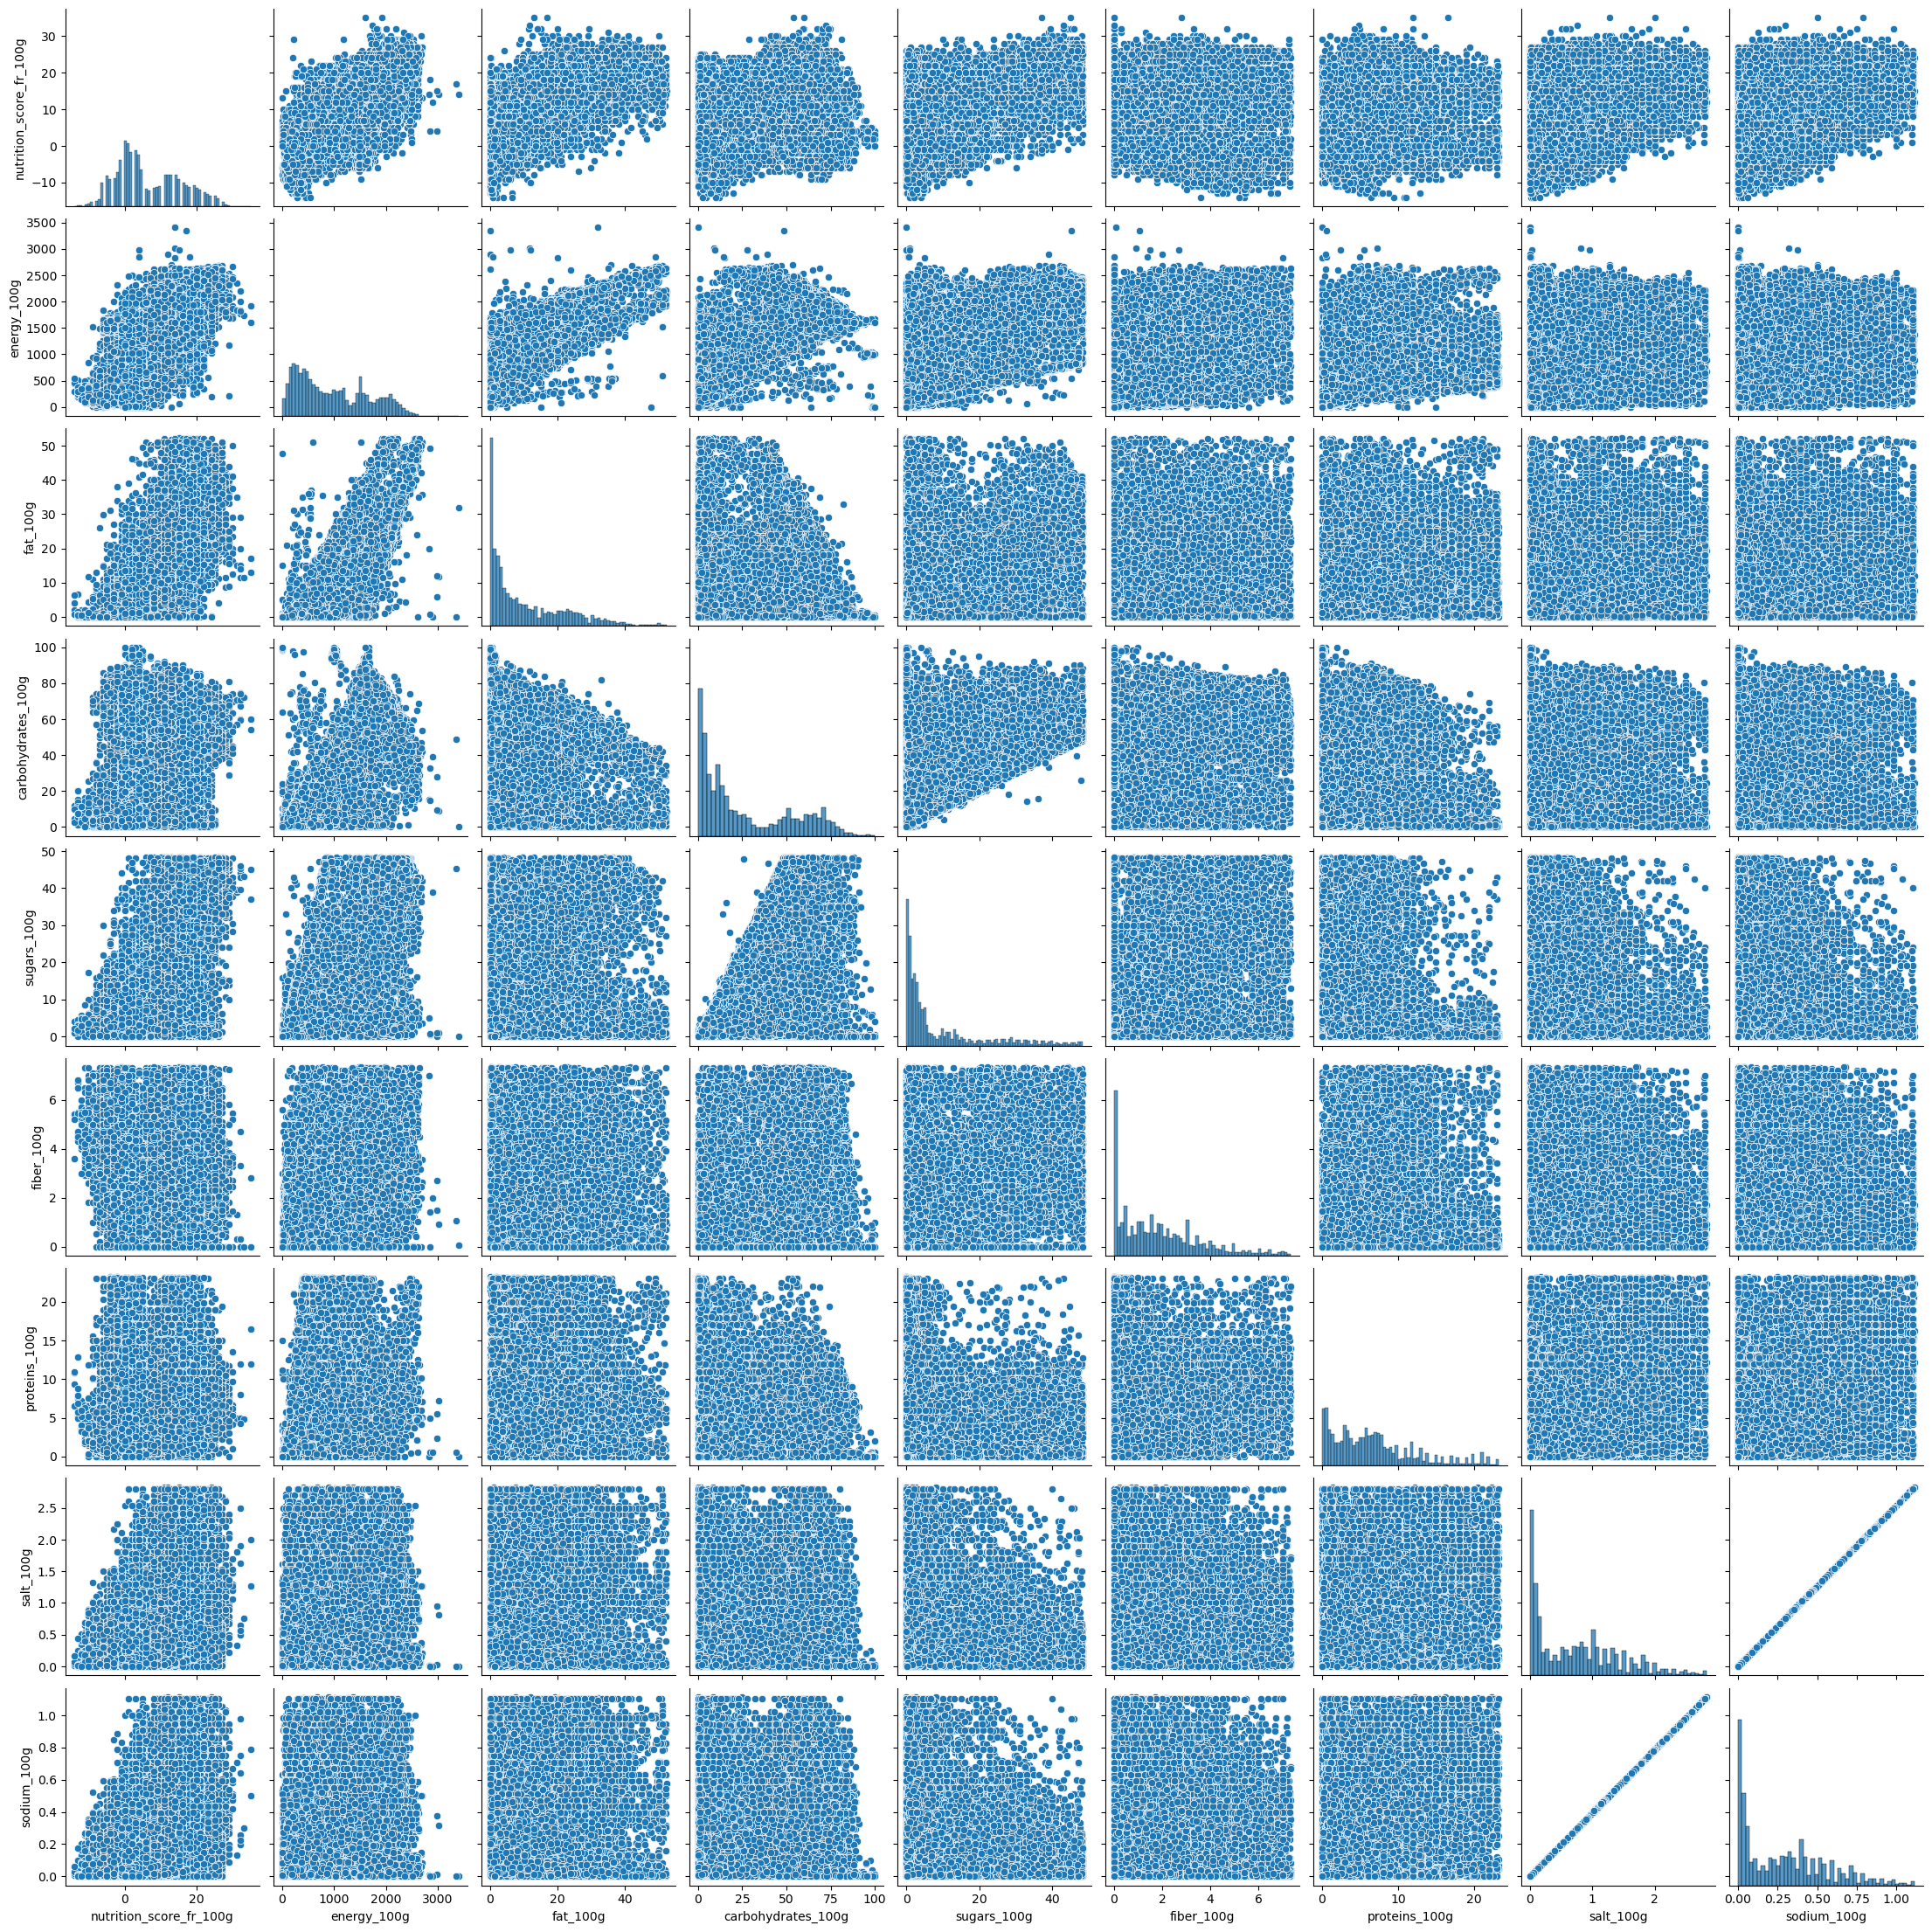

In [31]:
# Voici la visualisation des relations linéaires deux à deux entre les variables de nutrition.
plt.figure(figsize=(5,5))
sns.pairplot(data=open_food_facts_.select_dtypes(include = ['float64']))
plt.show()

### Répartition des scores de nutrition par grade / groupes d'aliments

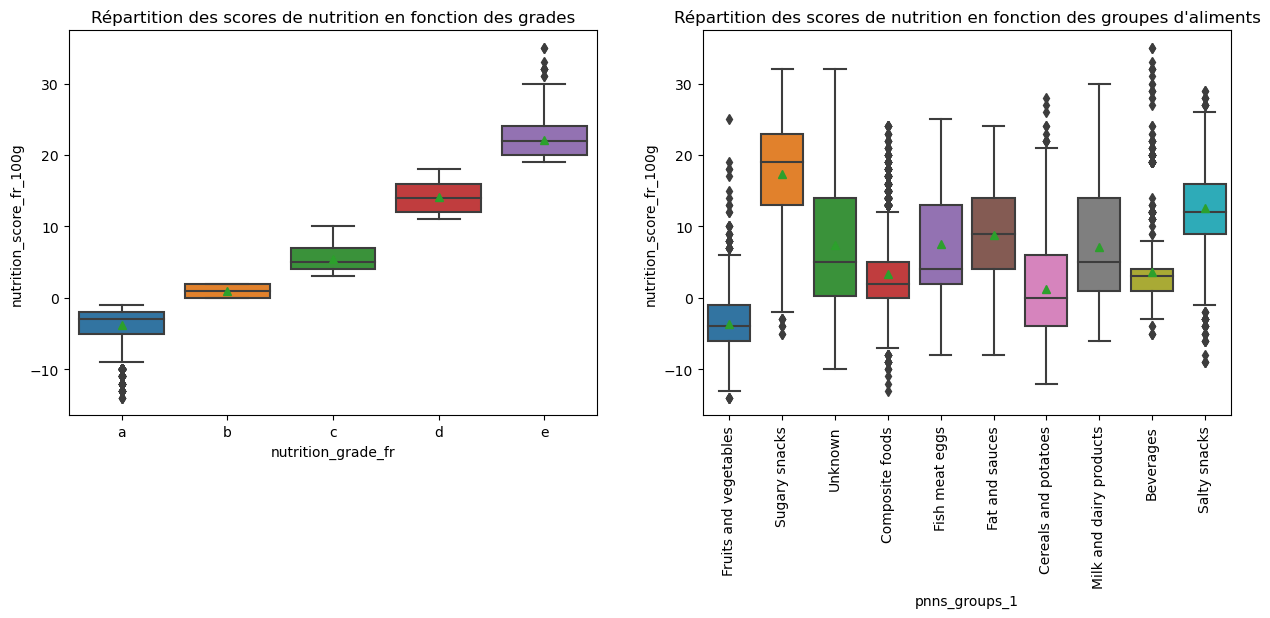

In [32]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.boxplot(x="nutrition_grade_fr", y="nutrition_score_fr_100g", data=open_food_facts_.sort_values("nutrition_grade_fr"),showmeans=True)
plt.title("Répartition des scores de nutrition en fonction des grades")

plt.subplot(122)
sns.boxplot(x="pnns_groups_1", y="nutrition_score_fr_100g", data=open_food_facts_,showmeans=True)
plt.xticks(rotation = 90)
plt.title("Répartition des scores de nutrition en fonction des groupes d'aliments")

plt.show()

Interprétation :
<br>
Pour la grade de nutrition :
- On remarque que plus le score de nutrition est grand moins l'aliment est considéré comme sain. 
- La classe de grade de nutrition a un impacte sur le score de nutrition.
<br>
<br>
Pour le groupe d'aliment :
- On remarque ici ques les groupes d'aliments semblent avoir des comportements assez différents en fonction de leurs scores de nutrition. 
- Par exemple, les scores de nutrition des fruits et légumes sont moins élevés et sont localisés dans la grade "a" comme étant des produits sains tandis que ceux des collations sucrés( "Sugary snacks") sont beaucoup plus élevés et donc considérés comme des aliments moins sains.

Nous verrons plus en bas si ces écarts sont significatifs ou pas via l'analyse de variance(ANOVA).

Les points verts au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

## 3.2 Analyse multivariée

In [33]:
open_food_facts_['pnns_groups_1'].unique()

array(['Fruits and vegetables', 'Sugary snacks', 'Unknown',
       'Composite foods', 'Fish meat eggs', 'Fat and sauces',
       'Cereals and potatoes', 'Milk and dairy products', 'Beverages',
       'Salty snacks'], dtype=object)

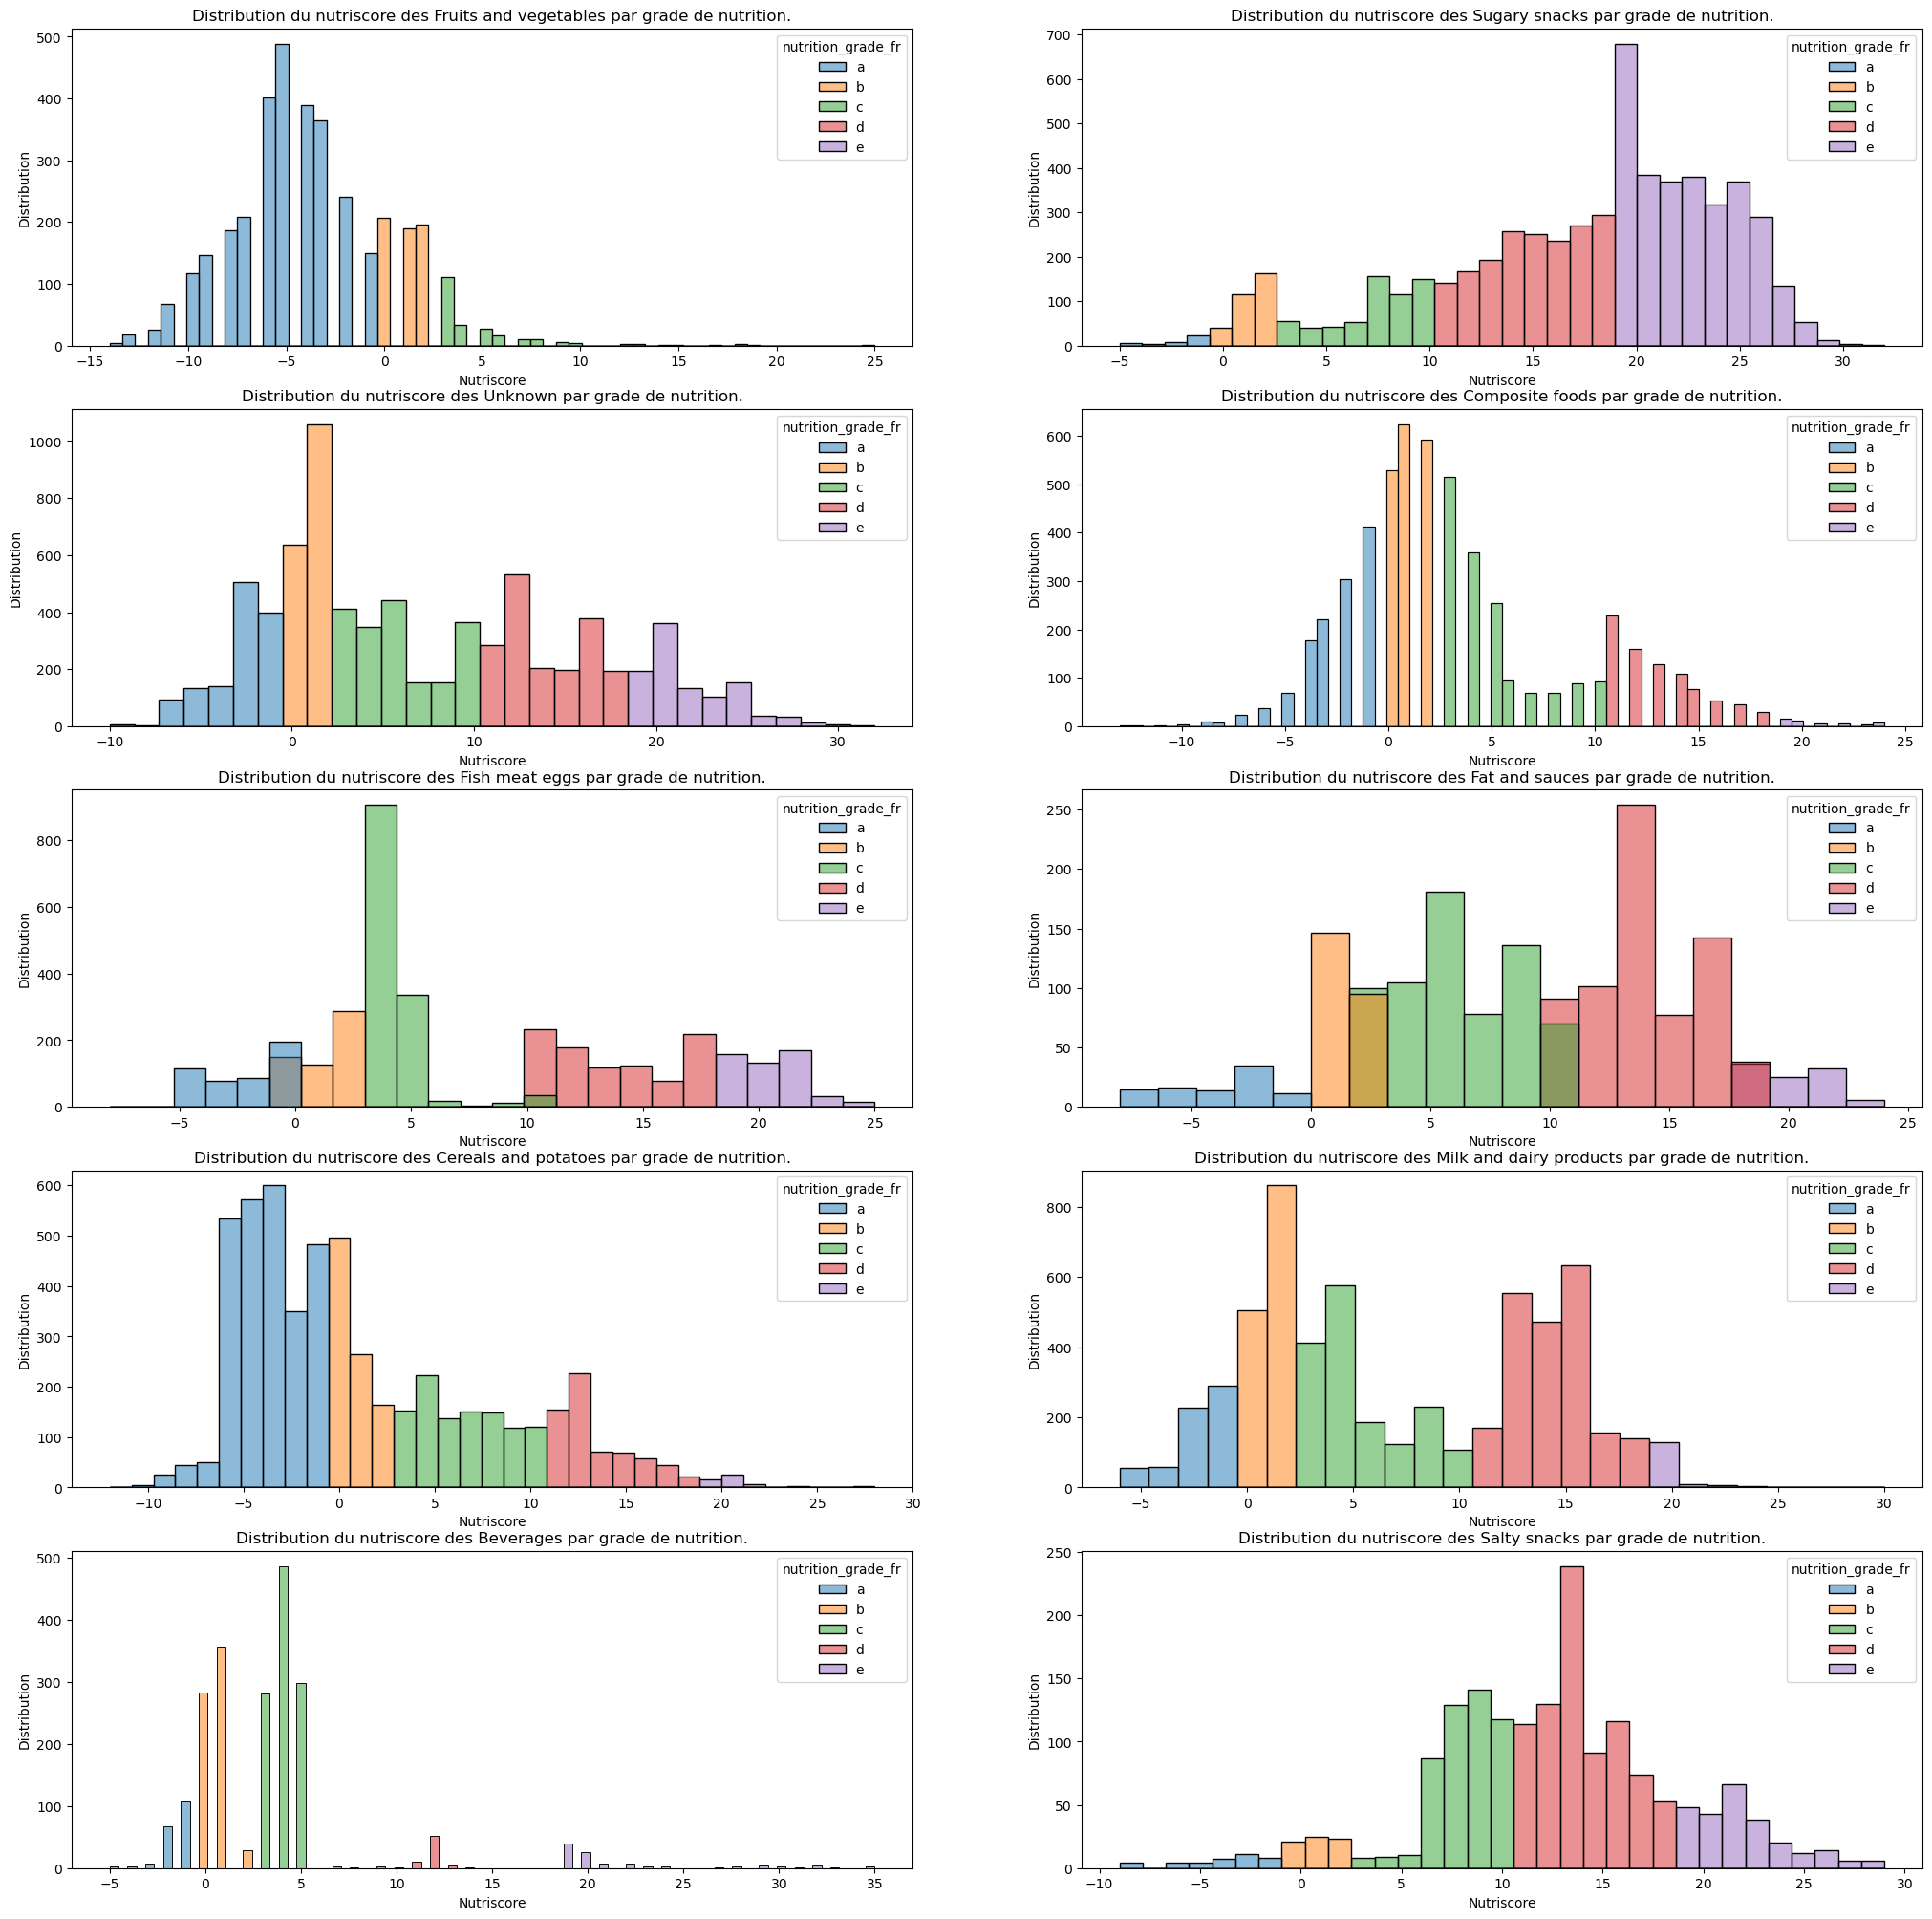

In [34]:
# 
fig, axes = plt.subplots(5, 2, sharex=False, sharey=False, figsize=(25,25))
axes = np.array(axes)
i=0
for ax in axes.reshape(-1):
    label = open_food_facts_.pnns_groups_1.unique()[i]
    sns.histplot(data=open_food_facts_.loc[open_food_facts_.pnns_groups_1==label].sort_values("nutrition_grade_fr"), x="nutrition_score_fr_100g", hue="nutrition_grade_fr", ax=ax)
    ax.set_title(f"Distribution du nutriscore des {label} par grade de nutrition.")
    ax.set_xlabel("Nutriscore")
    ax.set_ylabel("Distribution")
    i+=1
plt.show()

- On a ici la répartition du score de nutrition de chaque groupe d'aliment par sa grade de nutrition.

# 4. Tests statistiques

## 4.1 ANOVA (Analyse de la variance)

### ANOVA entre nutrition_grade_fr et nutrition_score_fr_100g

In [35]:
# All classes
grade_a = open_food_facts_.loc[open_food_facts_.nutrition_grade_fr=="a"].nutrition_score_fr_100g.values
grade_b = open_food_facts_.loc[open_food_facts_.nutrition_grade_fr=="b"].nutrition_score_fr_100g.values
grade_c = open_food_facts_.loc[open_food_facts_.nutrition_grade_fr=="c"].nutrition_score_fr_100g.values
grade_d = open_food_facts_.loc[open_food_facts_.nutrition_grade_fr=="d"].nutrition_score_fr_100g.values
grade_e = open_food_facts_.loc[open_food_facts_.nutrition_grade_fr=="e"].nutrition_score_fr_100g.values
 
# One-way ANOVA
oneway_anova = f_oneway(grade_a, grade_b, grade_c, grade_d, grade_e)
pvalue = oneway_anova.pvalue
if pvalue<0.05:    
    print(f"pvalue = {pvalue} : Nous rejettons donc l'hypothèse H0 selon laquelle les ditributions sont identiques.\nIl existe donc bien une différence du score de nutrition entre les grades de nutrition.\nAutrement dit, la grade de nutrition a bien une influence sur le nutriscore.")
else:
    print(f"pvalue = {pvalue}\nH0 est acceptée. Autrement dit, il n'existe pas une différence significative entre les groupes.")

pvalue = 0.0 : Nous rejettons donc l'hypothèse H0 selon laquelle les ditributions sont identiques.
Il existe donc bien une différence du score de nutrition entre les grades de nutrition.
Autrement dit, la grade de nutrition a bien une influence sur le nutriscore.


### ANOVA entre pnns_groups_1 et nutrition_score_fr_100g

In [36]:
# All classes
group_1 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Fruits and vegetables"].nutrition_score_fr_100g.values
group_2 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Sugary snacks"].nutrition_score_fr_100g.values
group_3 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Unknown"].nutrition_score_fr_100g.values
group_4 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Composite foods"].nutrition_score_fr_100g.values
group_5 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Fish meat eggs"].nutrition_score_fr_100g.values
group_6 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Fat and sauces"].nutrition_score_fr_100g.values
group_7 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Cereals and potatoes"].nutrition_score_fr_100g.values
group_8 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Milk and dairy products"].nutrition_score_fr_100g.values
group_9 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Beverages"].nutrition_score_fr_100g.values
group_10 = open_food_facts_.loc[open_food_facts_.pnns_groups_1=="Salty snacks"].nutrition_score_fr_100g.values

# Conduct the one-way ANOVA
oneway_anova = f_oneway(group_1, group_2, group_3, group_4,group_5,group_6,group_7,group_8,group_9,group_10)
pvalue = oneway_anova.pvalue
if pvalue<0.05:    
    print(f"pvalue = {pvalue} : Nous rejettons donc l'hypothèse H0 selon laquelle les ditributions sont identiques.\nIl existe donc bien une différence du score de nutrition entre les groupes d'aliments.\nAutrement dit, le groupe d'aliment du produit a bien une influence sur le nutriscore.")
    
else:
    print(f"pvalue = {pvalue}\nH0 est acceptée. Autrement dit, il n'existe pas une différence significative entre les groupes.")

pvalue = 0.0 : Nous rejettons donc l'hypothèse H0 selon laquelle les ditributions sont identiques.
Il existe donc bien une différence du score de nutrition entre les groupes d'aliments.
Autrement dit, le groupe d'aliment du produit a bien une influence sur le nutriscore.


## 4.2 Test du chi2 d'indépendance

### Test du chi2 entre pnns_groups_1 et pnns_groups_2

In [37]:
# Contigence table
contingency_table1 = pd.crosstab(open_food_facts_.pnns_groups_1.array, open_food_facts_.pnns_groups_2.array)  

# Chi2 test object
res = chi2_contingency(contingency_table1.values)

alpha = 0.05
if res.pvalue <= alpha:
    print(f"H0 est rejetée car p_value = {res.pvalue} <= alpha = {alpha}.\nLes deux variables ne sont donc pas indépendantes.")
else:
    print(f"H0 n'est pas rejetée car p_value = {res.pvalue} >= alpha = {alpha}.\nLes variables sont donc indépendantes.")

H0 est rejetée car p_value = 0.0 <= alpha = 0.05.
Les deux variables ne sont donc pas indépendantes.


- On pouvait s'attendre à obtenir ce resultat puisque les groupes et sous-groupes d'aliments sont naturellement lié par définition.

### Test de chi2 entre pnns_groups_1 et nutrition_grade_fr       

In [38]:
contingency_table2 = pd.crosstab(open_food_facts_.pnns_groups_1.array, open_food_facts_.nutrition_grade_fr.array)    
res = chi2_contingency(contingency_table2.values)

alpha = 0.05
if res.pvalue <= alpha:
    print(f'H0 est rejetée car p_value = {res.pvalue} <= alpha = {alpha}.\nLes variables pnns_groups_1 et nutrition_grade_fr ne sont donc pas indépendantes.')
else:
    print(f'H0 n\'est pas rejetée car p_value = {res.pvalue} >= alpha = {alpha}.\nLes variables pnns_groups_1 et nutrition_grade_f sont donc indépendantes.')

H0 est rejetée car p_value = 0.0 <= alpha = 0.05.
Les variables pnns_groups_1 et nutrition_grade_fr ne sont donc pas indépendantes.


# 5. Analyse en composantes principales (PCA)

- Avec tout ce qui précède, nous savons que potentiellement certaines variables nutritionnelles sont fortement corrélés.
- Nous tenterons de réduire la dimension de notre jeu de données en lui appliquant une analyse en composante principale. 
- Nous allons effectuer également une mise à l'echelle des variables nutrition.

In [39]:
# open_food_facts with only nutrition features
open_food_facts_pca = open_food_facts_.select_dtypes('float64').drop('nutrition_score_fr_100g', axis=1).dropna()

# Feature scaling before PCA
scaler_object = StandardScaler()

# PCA object 
pca_object = PCA(n_components=open_food_facts_pca.shape[1])

pca_pipeline = make_pipeline(scaler_object,pca_object)
pca_pipeline.fit_transform(open_food_facts_pca)

array([[ 1.83088854e+00,  3.28982801e+00, -6.30198705e-01, ...,
        -4.92643835e-01, -1.47915224e-02, -1.03666690e-03],
       [ 3.33253808e-01, -1.08942081e+00,  2.50261740e-01, ...,
        -3.45684031e-01, -3.38757879e-02,  7.23519404e-04],
       [ 8.15204934e-01,  1.13294906e+00, -1.35928602e+00, ...,
         6.33004947e-01,  5.75199665e-02,  4.14300922e-03],
       ...,
       [-4.91274273e-01, -2.15264547e+00, -1.05734298e+00, ...,
         2.33633154e+00, -6.47432000e-01,  5.03744767e-06],
       [ 3.21732128e+00,  4.13440521e-01, -5.14088063e-01, ...,
         4.61719566e-01, -8.52224902e-02,  9.20575987e-06],
       [ 1.72910430e+00, -8.61761739e-01, -2.53917413e+00, ...,
         3.09848208e-01,  3.66557865e-02, -2.74581843e-06]])

In [40]:
# Pipeline object
pca_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=8))])

## Sélection du nombre de composantes à analyser

In [41]:
# Percentage of variance explained by each of the selected components.
explained_variance_ratio = pca_pipeline[1].explained_variance_ratio_*100
explained_variance_ratio

array([3.55803123e+01, 3.18301210e+01, 1.14278633e+01, 9.27047857e+00,
       7.03455705e+00, 4.69796820e+00, 1.58698174e-01, 1.42918558e-06])

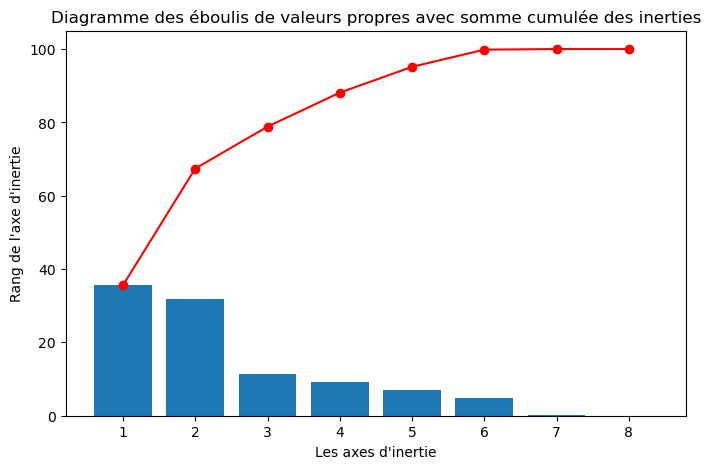

In [42]:
# 
plt.figure(figsize=(8,5))
plt.bar(np.arange(len(explained_variance_ratio))+1, explained_variance_ratio)
plt.plot(np.arange(len(explained_variance_ratio))+1,np.cumsum(explained_variance_ratio),marker='o',color="red")
plt.title("Diagramme des éboulis de valeurs propres avec somme cumulée des inerties")
plt.xlabel("Les axes d'inertie")
plt.ylabel("Rang de l'axe d'inertie")
plt.show()

On constate qu'à partir de 04 variables on a une variance cumulée de plus de 80%. On peut donc se restreindre à 4 dimensions tout en gardant le maximun d'informations sur le jeu de données.

In [43]:
print(f"Le premier plan factoriel représente {round(explained_variance_ratio[0:2].sum(),2)}% de l'inertie totale et le second représente {round(explained_variance_ratio[0:4].sum(),2)}% de l'inertie.")

Le premier plan factoriel représente 67.41% de l'inertie totale et le second représente 88.11% de l'inertie.


Les deux premiers plans factoriels couvrent une inertie de 88.11%. Nous pouvons donc analyser uniquement ces 2 plans factoriels. 

## Cercle des corrélations

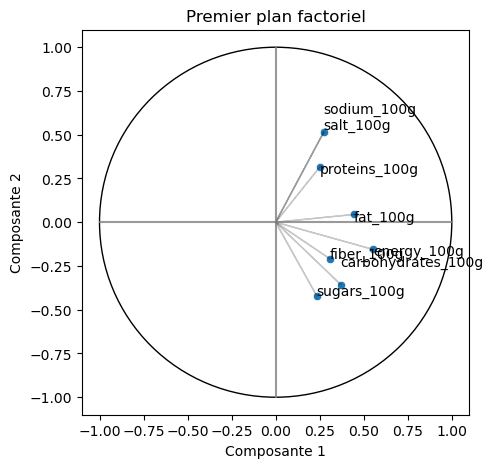

In [44]:
cols = open_food_facts_pca.columns

plt.figure(figsize=(5,5))
plt.title("Premier plan factoriel")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))

# First component
ax1_pca = pca_pipeline[1].components_[0,:]
# Second component
ax2_pca = pca_pipeline[1].components_[1,:]

sns.scatterplot(x = ax1_pca,y = ax2_pca)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(ax1_pca,ax2_pca, cols):
    plt.annotate(colonne,(x,y),textcoords="offset points", xytext=(0,5+np.random.randint(-10,10))) 
    ax.arrow(0, 0, x, y,alpha=0.2)

plt.show()

**Interprétations du premier cercle de corrélation** :

- sodium_100g et salt_100g semblent parfaitement confondues. Elles sont positivement corrélées entre-elles comme on l'avait annoncé plus haut. Et elles sont fortement corrélées au deuxième axe principal(l'axe des ordonnées). La variable sugars_100g semble, elle, fortement anticorrélée à cet axe.
- energy_100, carbohydrates_100g et fat_100g semblent bien expliquer la variance sur la composante 1(premier axe principal), moins sur la composante 2.

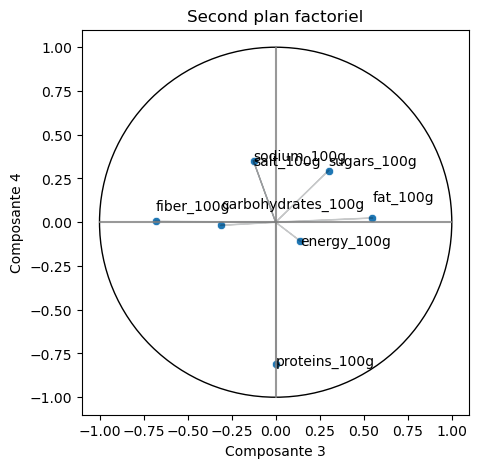

In [45]:
cols = open_food_facts_pca.columns

plt.figure(figsize=(5,5))
plt.title("Second plan factoriel")
plt.xlabel("Composante 3")
plt.ylabel("Composante 4")
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))

# Thirdth component
ax3_pca = pca_pipeline[1].components_[2,:]
# Fourth component
ax4_pca = pca_pipeline[1].components_[3,:]

sns.scatterplot(x = ax3_pca,y = ax4_pca)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(ax3_pca,ax4_pca, cols):
    plt.annotate(colonne,(x,y),textcoords="offset points", xytext=(0,5+np.random.randint(-10,10))) 
    ax.arrow(0, 0, x, y,alpha=0.2)

plt.show()

**Interprétations du second cercle de corrélation** :

Le second plan factoriel semble mieux représenter nos données. Il classe assez clairement nos données nutritionnelles en 2 groupes. 
- Les variables salt_100g, sodium_100g et sugars_100g qui semblent fortement corrélées à l'axe principal 4 tandis que la variable proteins_100g leur est fortement anticorrélées.
- La variable fat_100g semble fortement corrélée à l'axe principal 3, tandis que carbohydrates_100g et fiber_100g semblent leur être fortement anticorrélées.

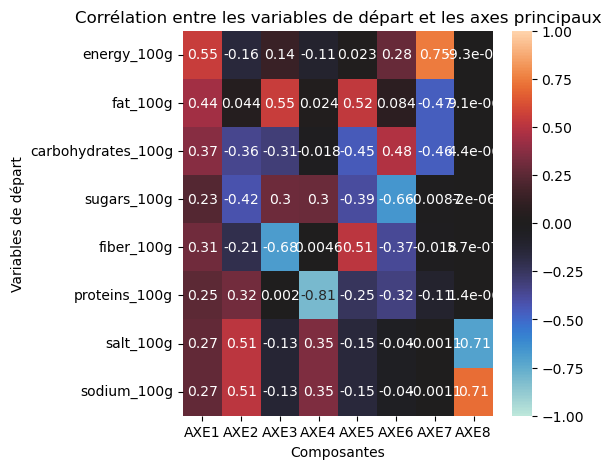

In [46]:
# Matrice des coefficients des composantes principales
acp_dataframe = pd.DataFrame(pca_pipeline[1].components_,index=["AXE"+str(i+1) for i in range(open_food_facts_pca.shape[1])],columns=cols).T
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(acp_dataframe, annot=True,vmin=-1, vmax=1, center=0)
plt.title("Corrélation entre les variables de départ et les axes principaux")
plt.xlabel("Composantes")
plt.ylabel("Variables de départ")
plt.show()

On peut ainsi regrouper nos variables nutritionnelles en deux nouvelles variables synthétiques par souci d'éfficacité tout en gardant le maximum d'information nutritionnelles grâce à l'ACP.